# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Data Problem Definition**: The goal is to identify the key factors that influence the price of used cars based on historical data. Using various regression models, we aim to predict the price of a car based on features such as year, manufacturer, model, condition, fuel type, odometer reading, transmission type, and other attributes. This will allow us to quantify how each feature affects the price and provide insights into the most significant drivers of used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Initial Exploration**:
The first step in exploring the dataset is to load it and take a look at the first few rows to understand how it's organized. This helps us see the column names and the types of data in each column. We should also check the size of the dataset, including how many rows and columns it has. It's important for us to look for any missing data, duplicate rows, and make sure each column has the right type of data. Finally, we review the price and other numerical columns to understand their range and identify any unusual values.

**Exploratory Data Analysis (EDA)**:
Next, we explore key features of the dataset, like price, year, mileage (odometer), fuel type, condition, and manufacturer, by using charts or graphs. This helps us see patterns, trends, or problems like outliers. We also check how the numeric features relate to the price, since this can show what affects the price the most. For categorical features (like fuel type or condition), we look at how often each category appears. Finally, we examine how missing values are distributed across the dataset to understand their pattern.

**Quality Issues**:
After exploring the data, it’s important for us to identify any quality issues. This includes looking for outliers, or values that don’t make sense, in columns like price, year, and mileage. Outliers can affect our analysis, so we need to address them. We also need to check for missing data and understand how it’s spread out in the dataset. Once we know where the issues are, we can decide how to handle them, either by removing or filling in the missing data, to make sure our dataset is clean and ready for analysis.

##### Initial Exploration

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector

# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Initial exploration
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [119]:
# Check for missing values and duplicates
print(df.isnull().sum())

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Number of duplicate rows: 0


In [120]:
# Describe numerical columns

df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [121]:
# Check for missing values and duplicates
print(df.isnull().sum())

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Number of duplicate rows: 0


In [122]:
# Study how many instances where price is 0 and what type of cars are listed as price 0.
zero_price_rows = df[(df['price'] == 0) & (df['year'].notna())]
print(zero_price_rows.shape[0])
print(zero_price_rows.head())

32863
             id      region  price    year manufacturer              model  \
46   7315039307      auburn      0  2011.0         jeep            compass   
126  7305672709      auburn      0  2018.0    chevrolet  express cargo van   
127  7305672266      auburn      0  2019.0    chevrolet  express cargo van   
128  7305672252      auburn      0  2018.0    chevrolet  express cargo van   
191  7316755272  birmingham      0  2015.0       nissan             sentra   

     condition    cylinders fuel  odometer title_status transmission  \
46   excellent          NaN  gas   99615.0        clean    automatic   
126   like new  6 cylinders  gas   68472.0        clean    automatic   
127   like new  6 cylinders  gas   69125.0        clean    automatic   
128   like new  6 cylinders  gas   66555.0        clean    automatic   
191  excellent  4 cylinders  gas   99505.0        clean    automatic   

                   VIN drive       size   type paint_color state  
46                 NaN   

#### Exploratory Data Analysis

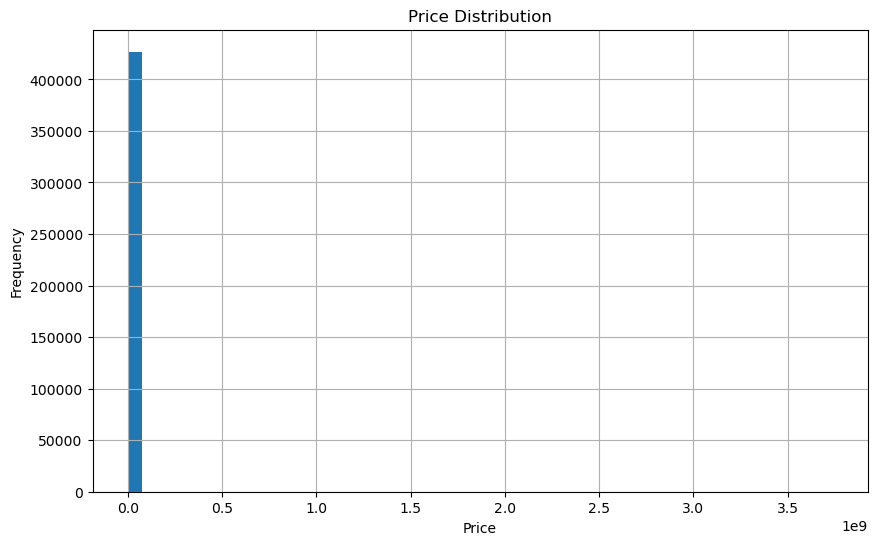

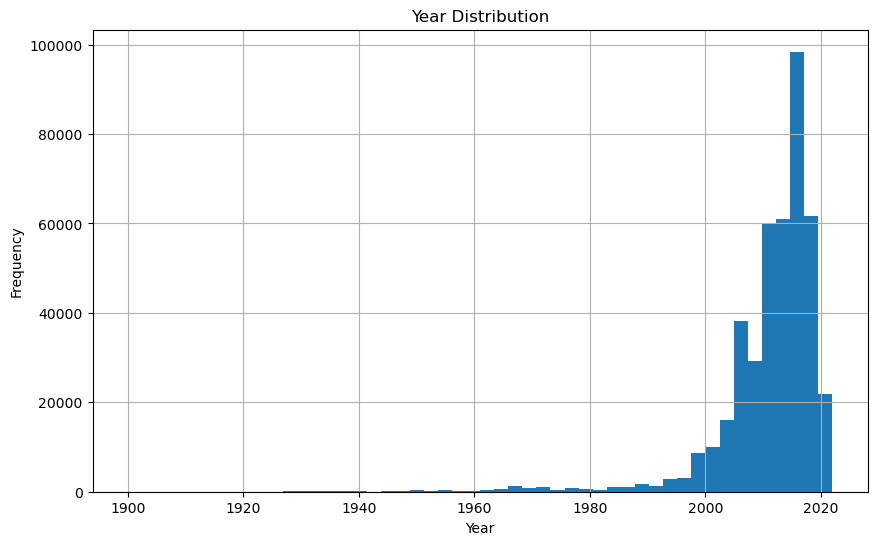

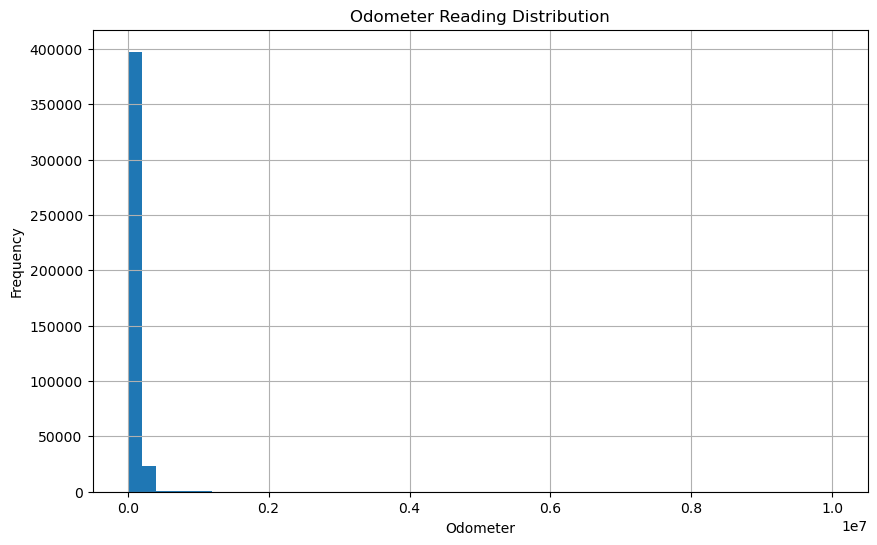

In [123]:
# Visualize distributions of numeric columns
df['price'].hist(bins=50, figsize=(10, 6))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

df['year'].hist(bins=50, figsize=(10, 6))
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

df['odometer'].hist(bins=50, figsize=(10, 6))
plt.title('Odometer Reading Distribution')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

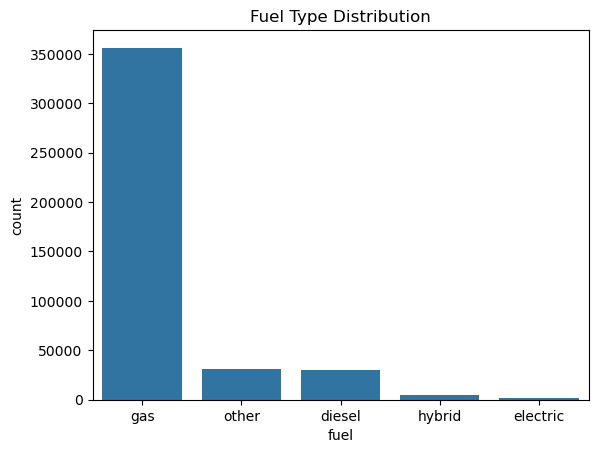

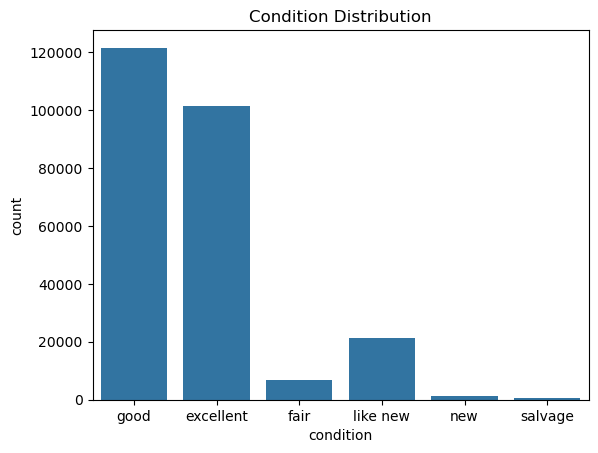

In [124]:
# Visualize categorical features
sns.countplot(data=df, x='fuel')
plt.title('Fuel Type Distribution')
plt.show()

sns.countplot(data=df, x='condition')
plt.title('Condition Distribution')
plt.show()

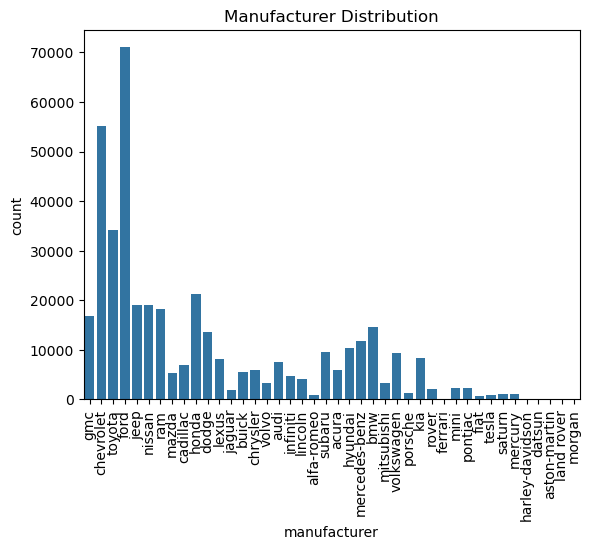

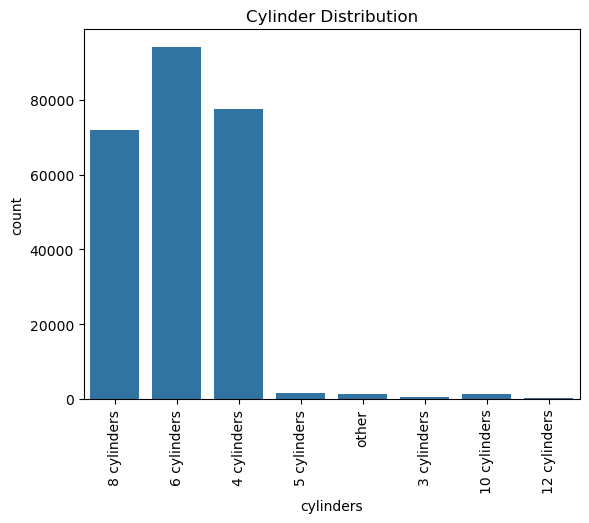

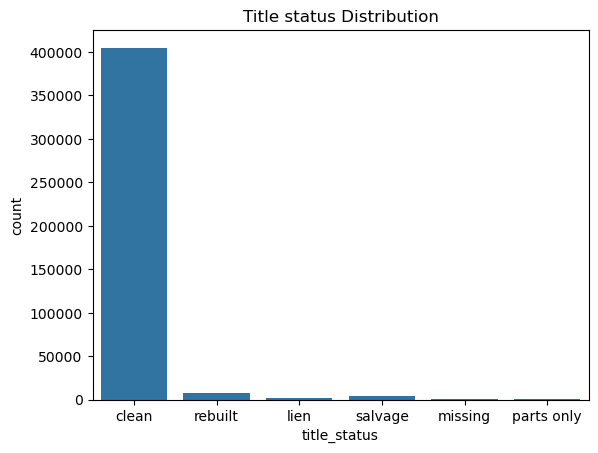

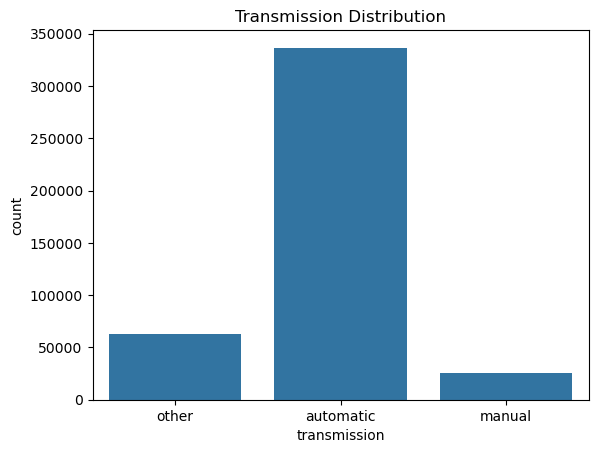

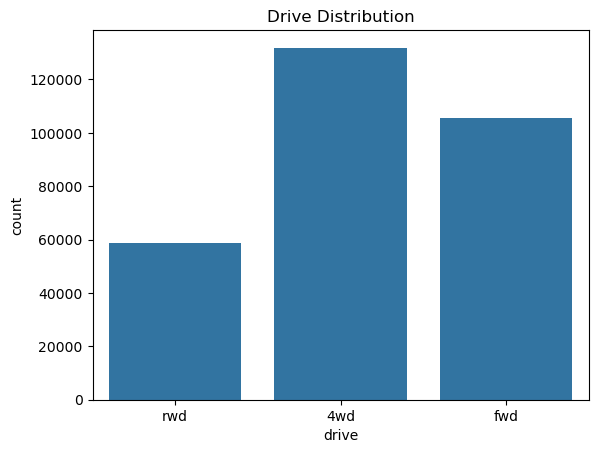

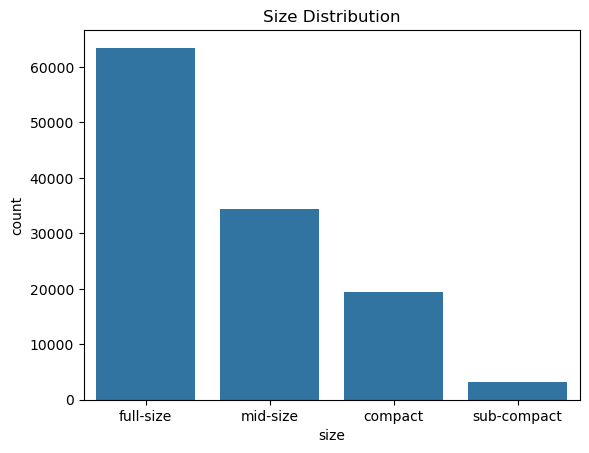

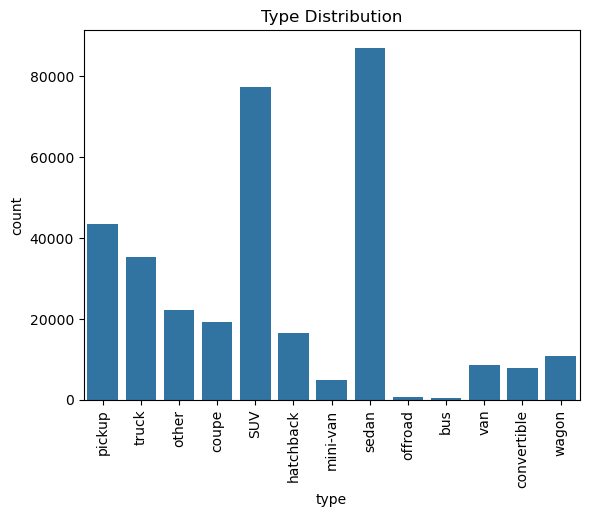

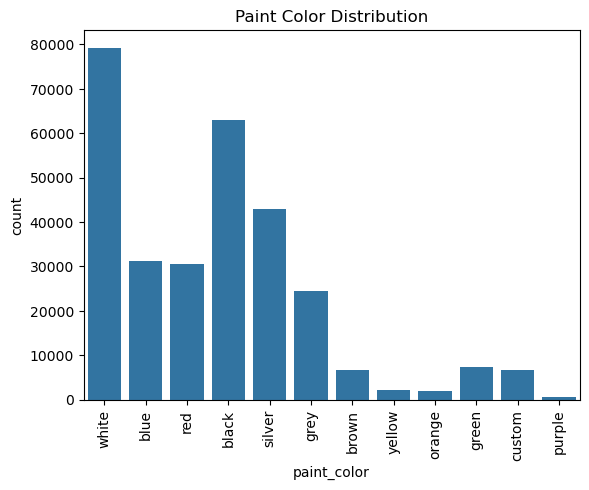

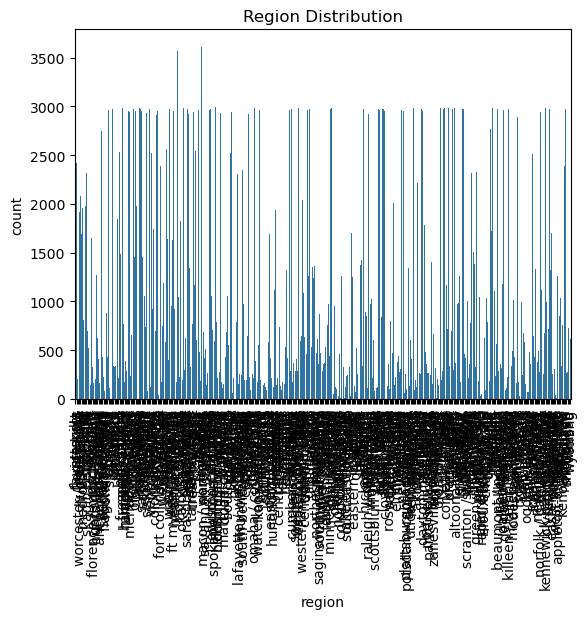

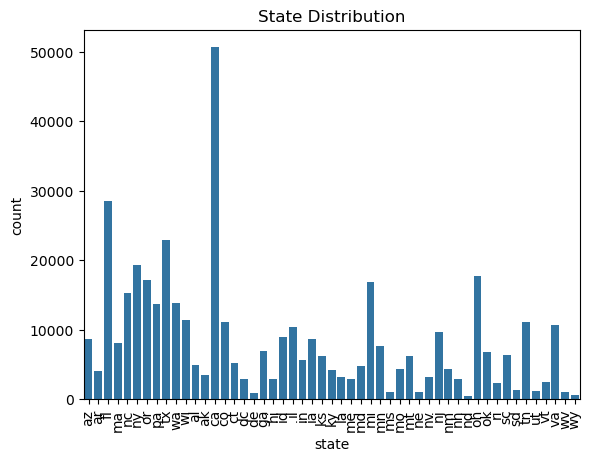

In [125]:
# Visualize categorical features
sns.countplot(data=df, x='manufacturer')
plt.title('Manufacturer Distribution')
plt.xticks(rotation=90)
plt.show()

#sns.countplot(data=df, x='model')
#plt.title('Model Distribution')
#plt.show()

sns.countplot(data=df, x='cylinders')
plt.title('Cylinder Distribution')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df, x='title_status')
plt.title('Title status Distribution')
plt.show()

sns.countplot(data=df, x='transmission')
plt.title('Transmission Distribution')
plt.show()

sns.countplot(data=df, x='drive')
plt.title('Drive Distribution')
plt.show()

sns.countplot(data=df, x='size')
plt.title('Size Distribution')
plt.show()

sns.countplot(data=df, x='type')
plt.title('Type Distribution')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df, x='paint_color')
plt.title('Paint Color Distribution')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df, x='region')
plt.title('Region Distribution')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df, x='state')
plt.title('State Distribution')
plt.xticks(rotation=90)
plt.show()

In [126]:
# Filter rows where the 'size' column is 'full' and display the 'type' column
full_size_entries = df[df['size'] == 'mid-size'][['type']]

# Show the result
print(full_size_entries)

            type
73         sedan
86      mini-van
110     mini-van
138          SUV
217          SUV
...          ...
426720     sedan
426729     other
426743     sedan
426747     sedan
426793     sedan

[34476 rows x 1 columns]


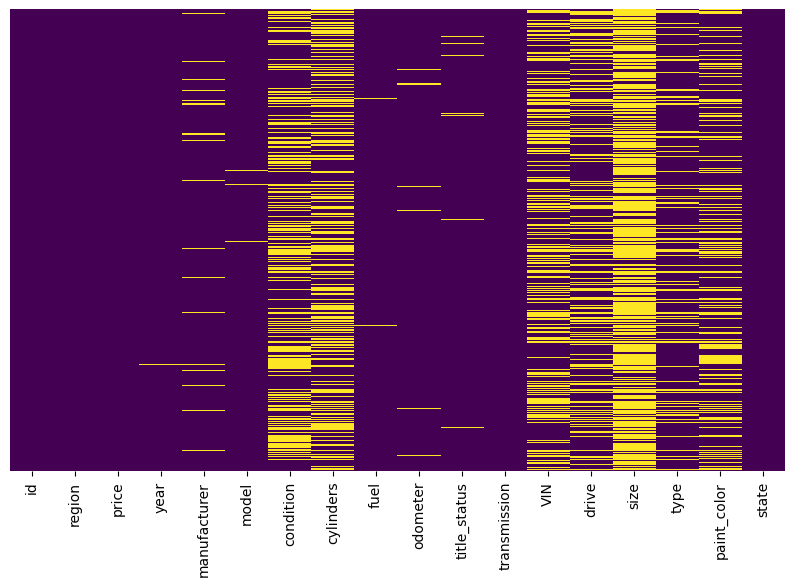

In [127]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Show the plot
plt.show()

In [128]:
# what kind of cars are type "other"
full_size_entries = df[df['type'] == 'other']

print(full_size_entries)

                id   region  price    year   manufacturer  \
36      7316133914   auburn  38590  2011.0      chevrolet   
38      7315816316   auburn  32990  2017.0           jeep   
52      7314584315   auburn  31590  2020.0          mazda   
56      7313857831   auburn  16590  2016.0           jeep   
63      7313319521   auburn  34990  2018.0           ford   
...            ...      ...    ...     ...            ...   
426858  7301953587  wyoming  51990  2020.0       cadillac   
426859  7301952155  wyoming  48590  2020.0       cadillac   
426860  7301951544  wyoming  39990  2017.0       infiniti   
426866  7301949190  wyoming  32990  2016.0       infiniti   
426873  7301591202  wyoming  30990  2018.0  mercedes-benz   

                           model condition    cylinders fuel  odometer  \
36          corvette grand sport      good  8 cylinders  gas   30237.0   
38      wrangler unlimited sport      good  6 cylinders  gas   30041.0   
52               mx-5 miata club      good   

#### Quality Issues


After exploring the dataset, I have identified several quality issues that need to be addressed to ensure clean and reliable data for analysis. Outliers were found in the price, year, and mileage columns, which need to be handled to avoid skewing the results. There are many instances where the price is 0, even though other parameters suggest that the price should be higher. The columns id, region, model, VIN, state, manufacturer, cylinders, size and paint_color are deemed unnecessary for the analysis, and I will remove them as they contain irrelevant or inconsistent data. There are also significant missing values in the drive and transmission columns, we will introduce a new "unknown" option to handle missing entries. Finally, after addressing these issues, we will remove any remaining rows with null values to ensure the dataset is clean and ready for analysis.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Cleanup

In [129]:
df_clean = df.drop(columns=['id', 'region', 'model', 'VIN', 'state', 'manufacturer', 'cylinders', 'size', 'paint_color'])

In [130]:
# Fill missing values in drive, and transmission with 'unknown'
df_clean.fillna({'drive': 'unknown'}, inplace=True)
df_clean.fillna({'transmission': 'unknown'}, inplace=True)

In [131]:
# drop NaN rows (price, year, and odometer) and remove rows where price is 0.
df_clean = df_clean.dropna(subset=['price', 'year', 'odometer'])
df_clean = df_clean[df_clean['price'] != 0]

In [132]:
# Function to detect and handle outliers using IQR
def handle_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# Handle outliers in 'price' column
df_clean = handle_outliers(df_clean, 'price')

# Handle outliers in 'year' column
df_clean = handle_outliers(df_clean, 'year')

# Handle outliers in 'mileage' column
df_clean = handle_outliers(df_clean, 'odometer')

# Show the cleaned data
print(df_clean)

        price    year  condition    fuel  odometer title_status transmission  \
27      33590  2014.0       good     gas   57923.0        clean        other   
28      22590  2010.0       good     gas   71229.0        clean        other   
29      39590  2020.0       good     gas   19160.0        clean        other   
30      30990  2017.0       good     gas   41124.0        clean        other   
31      15000  2013.0  excellent     gas  128000.0        clean    automatic   
...       ...     ...        ...     ...       ...          ...          ...   
426875  23590  2019.0       good     gas   32226.0        clean        other   
426876  30590  2020.0       good     gas   12029.0        clean        other   
426877  34990  2020.0       good  diesel    4174.0        clean        other   
426878  28990  2018.0       good     gas   30112.0        clean        other   
426879  30590  2019.0       good     gas   22716.0        clean        other   

          drive       type  
27      un

In [133]:
# Initialize the scaler
scaler = StandardScaler()

# Columns to standardize
columns_to_standardize = ['price', 'year', 'odometer']

# Apply standardization
df_clean[columns_to_standardize] = scaler.fit_transform(df_clean[columns_to_standardize])

In [134]:
print(df_clean.info())
df_clean.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 364750 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         364750 non-null  float64
 1   year          364750 non-null  float64
 2   condition     225373 non-null  object 
 3   fuel          362674 non-null  object 
 4   odometer      364750 non-null  float64
 5   title_status  357772 non-null  object 
 6   transmission  364750 non-null  object 
 7   drive         364750 non-null  object 
 8   type          288428 non-null  object 
dtypes: float64(3), object(6)
memory usage: 27.8+ MB
None


,price,year,condition,fuel,odometer,title_status,transmission,drive,type
426875,0.434668,1.196238,good,gas,-0.991175,clean,other,fwd,sedan
426876,0.980832,1.378743,good,gas,-1.323263,clean,other,fwd,sedan
426877,1.324136,1.378743,good,diesel,-1.452419,clean,other,unknown,hatchback
426878,0.855995,1.013734,good,gas,-1.025934,clean,other,fwd,sedan
426879,0.980832,1.196238,good,gas,-1.147543,clean,other,rwd,coupe


#### Verify data

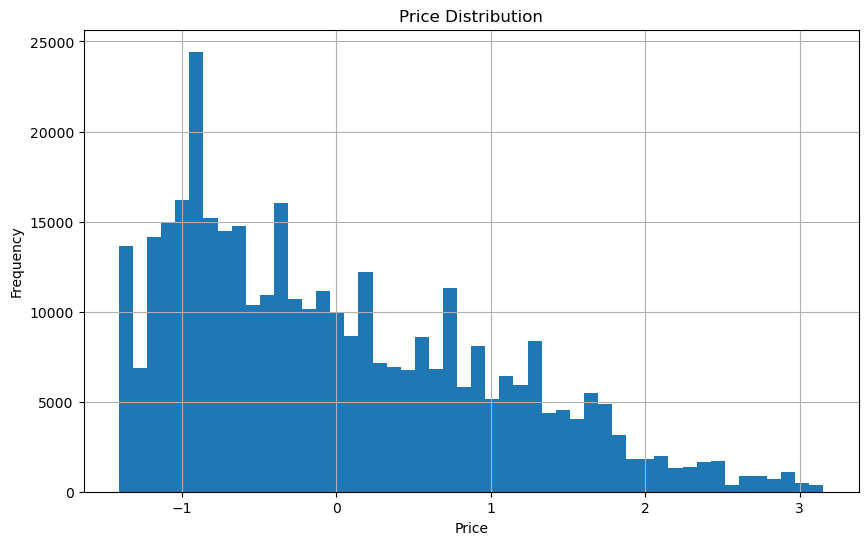

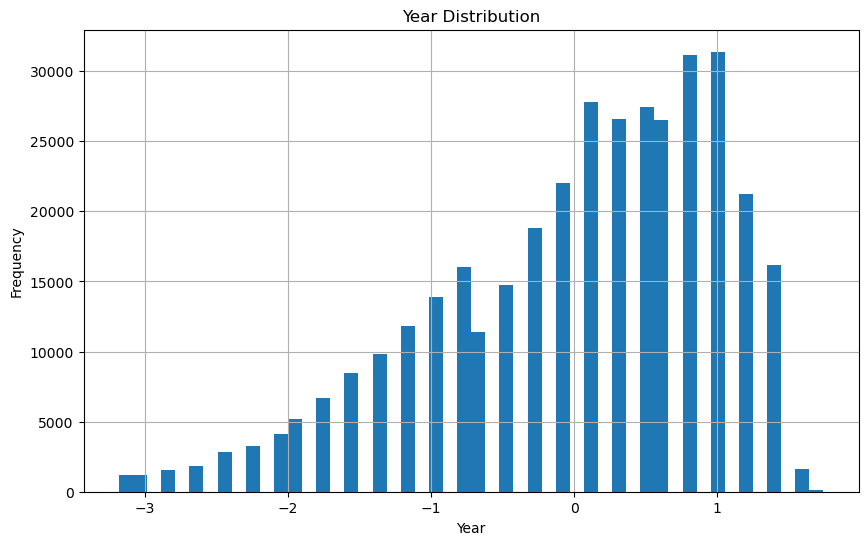

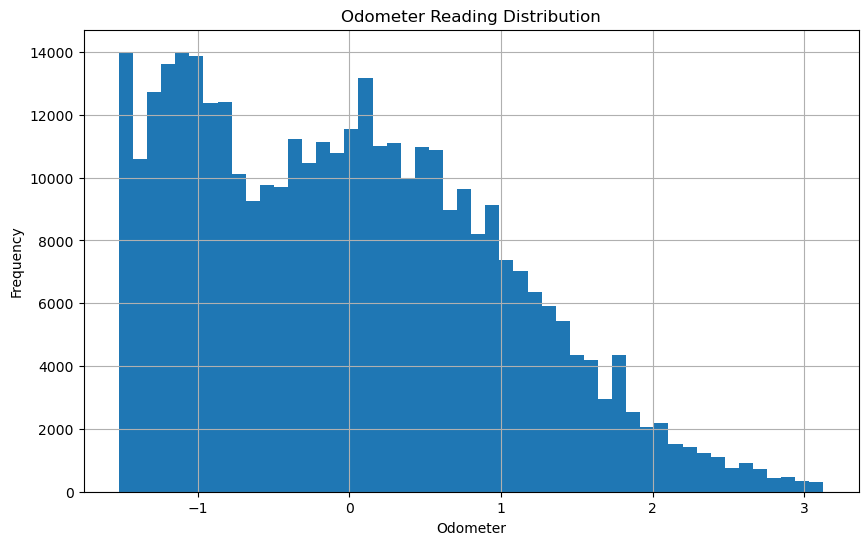

In [135]:
# Visualize distributions of numeric columns
df_clean['price'].hist(bins=50, figsize=(10, 6))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

df_clean['year'].hist(bins=50, figsize=(10, 6))
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

df_clean['odometer'].hist(bins=50, figsize=(10, 6))
plt.title('Odometer Reading Distribution')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

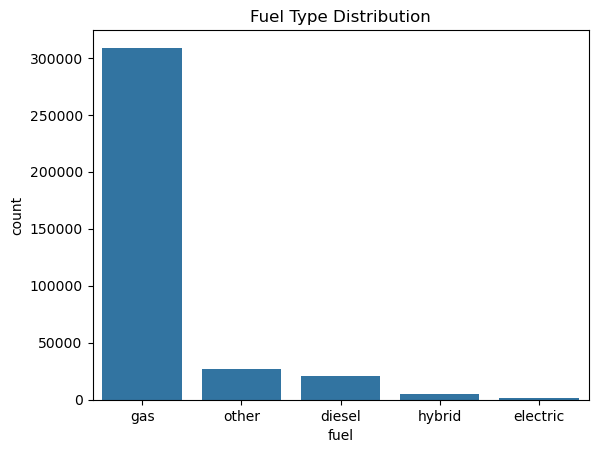

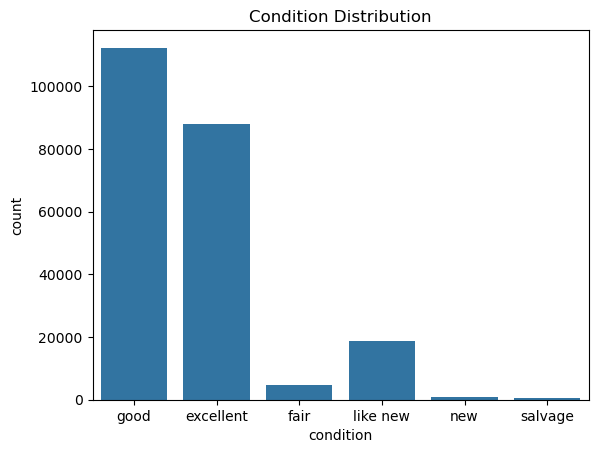

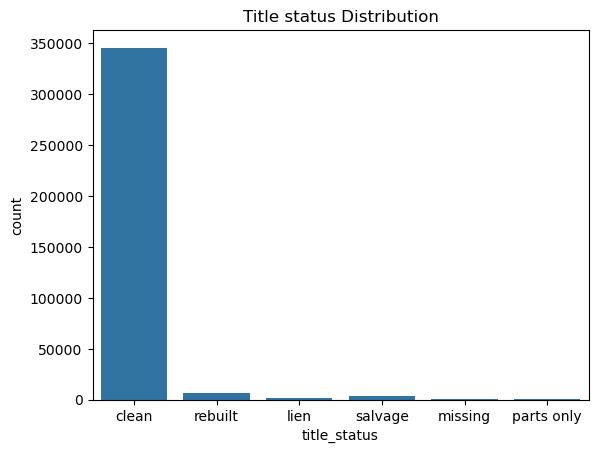

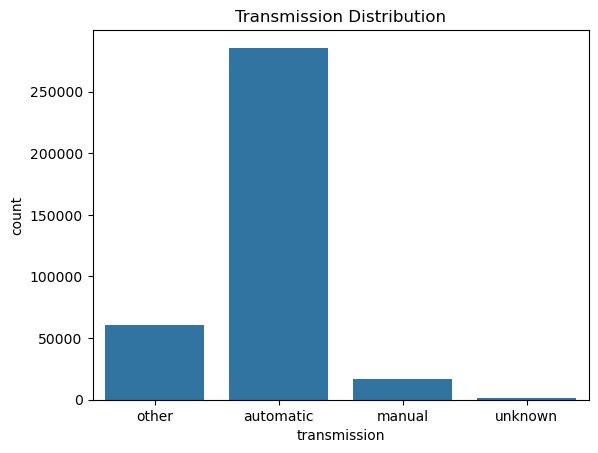

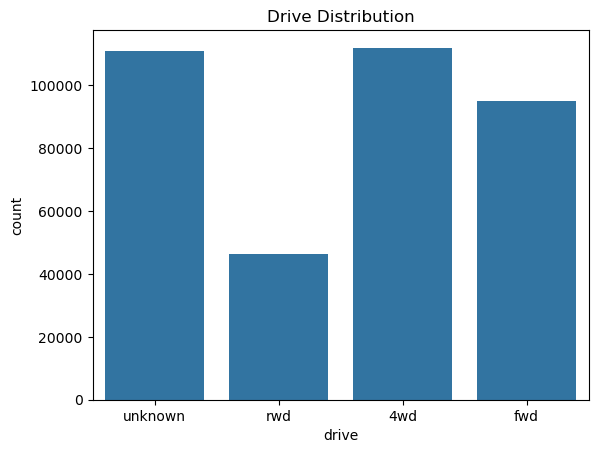

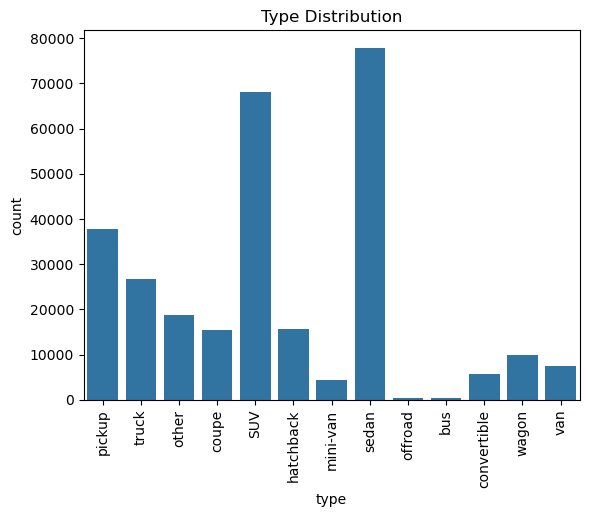

In [136]:
# Visualize categorical features
sns.countplot(data=df_clean, x='fuel')
plt.title('Fuel Type Distribution')
plt.show()

sns.countplot(data=df_clean, x='condition')
plt.title('Condition Distribution')
plt.show()

sns.countplot(data=df_clean, x='title_status')
plt.title('Title status Distribution')
plt.show()

sns.countplot(data=df_clean, x='transmission')
plt.title('Transmission Distribution')
plt.show()

sns.countplot(data=df_clean, x='drive')
plt.title('Drive Distribution')
plt.show()

sns.countplot(data=df_clean, x='type')
plt.title('Type Distribution')
plt.xticks(rotation=90)
plt.show()

#### Filter categorical features

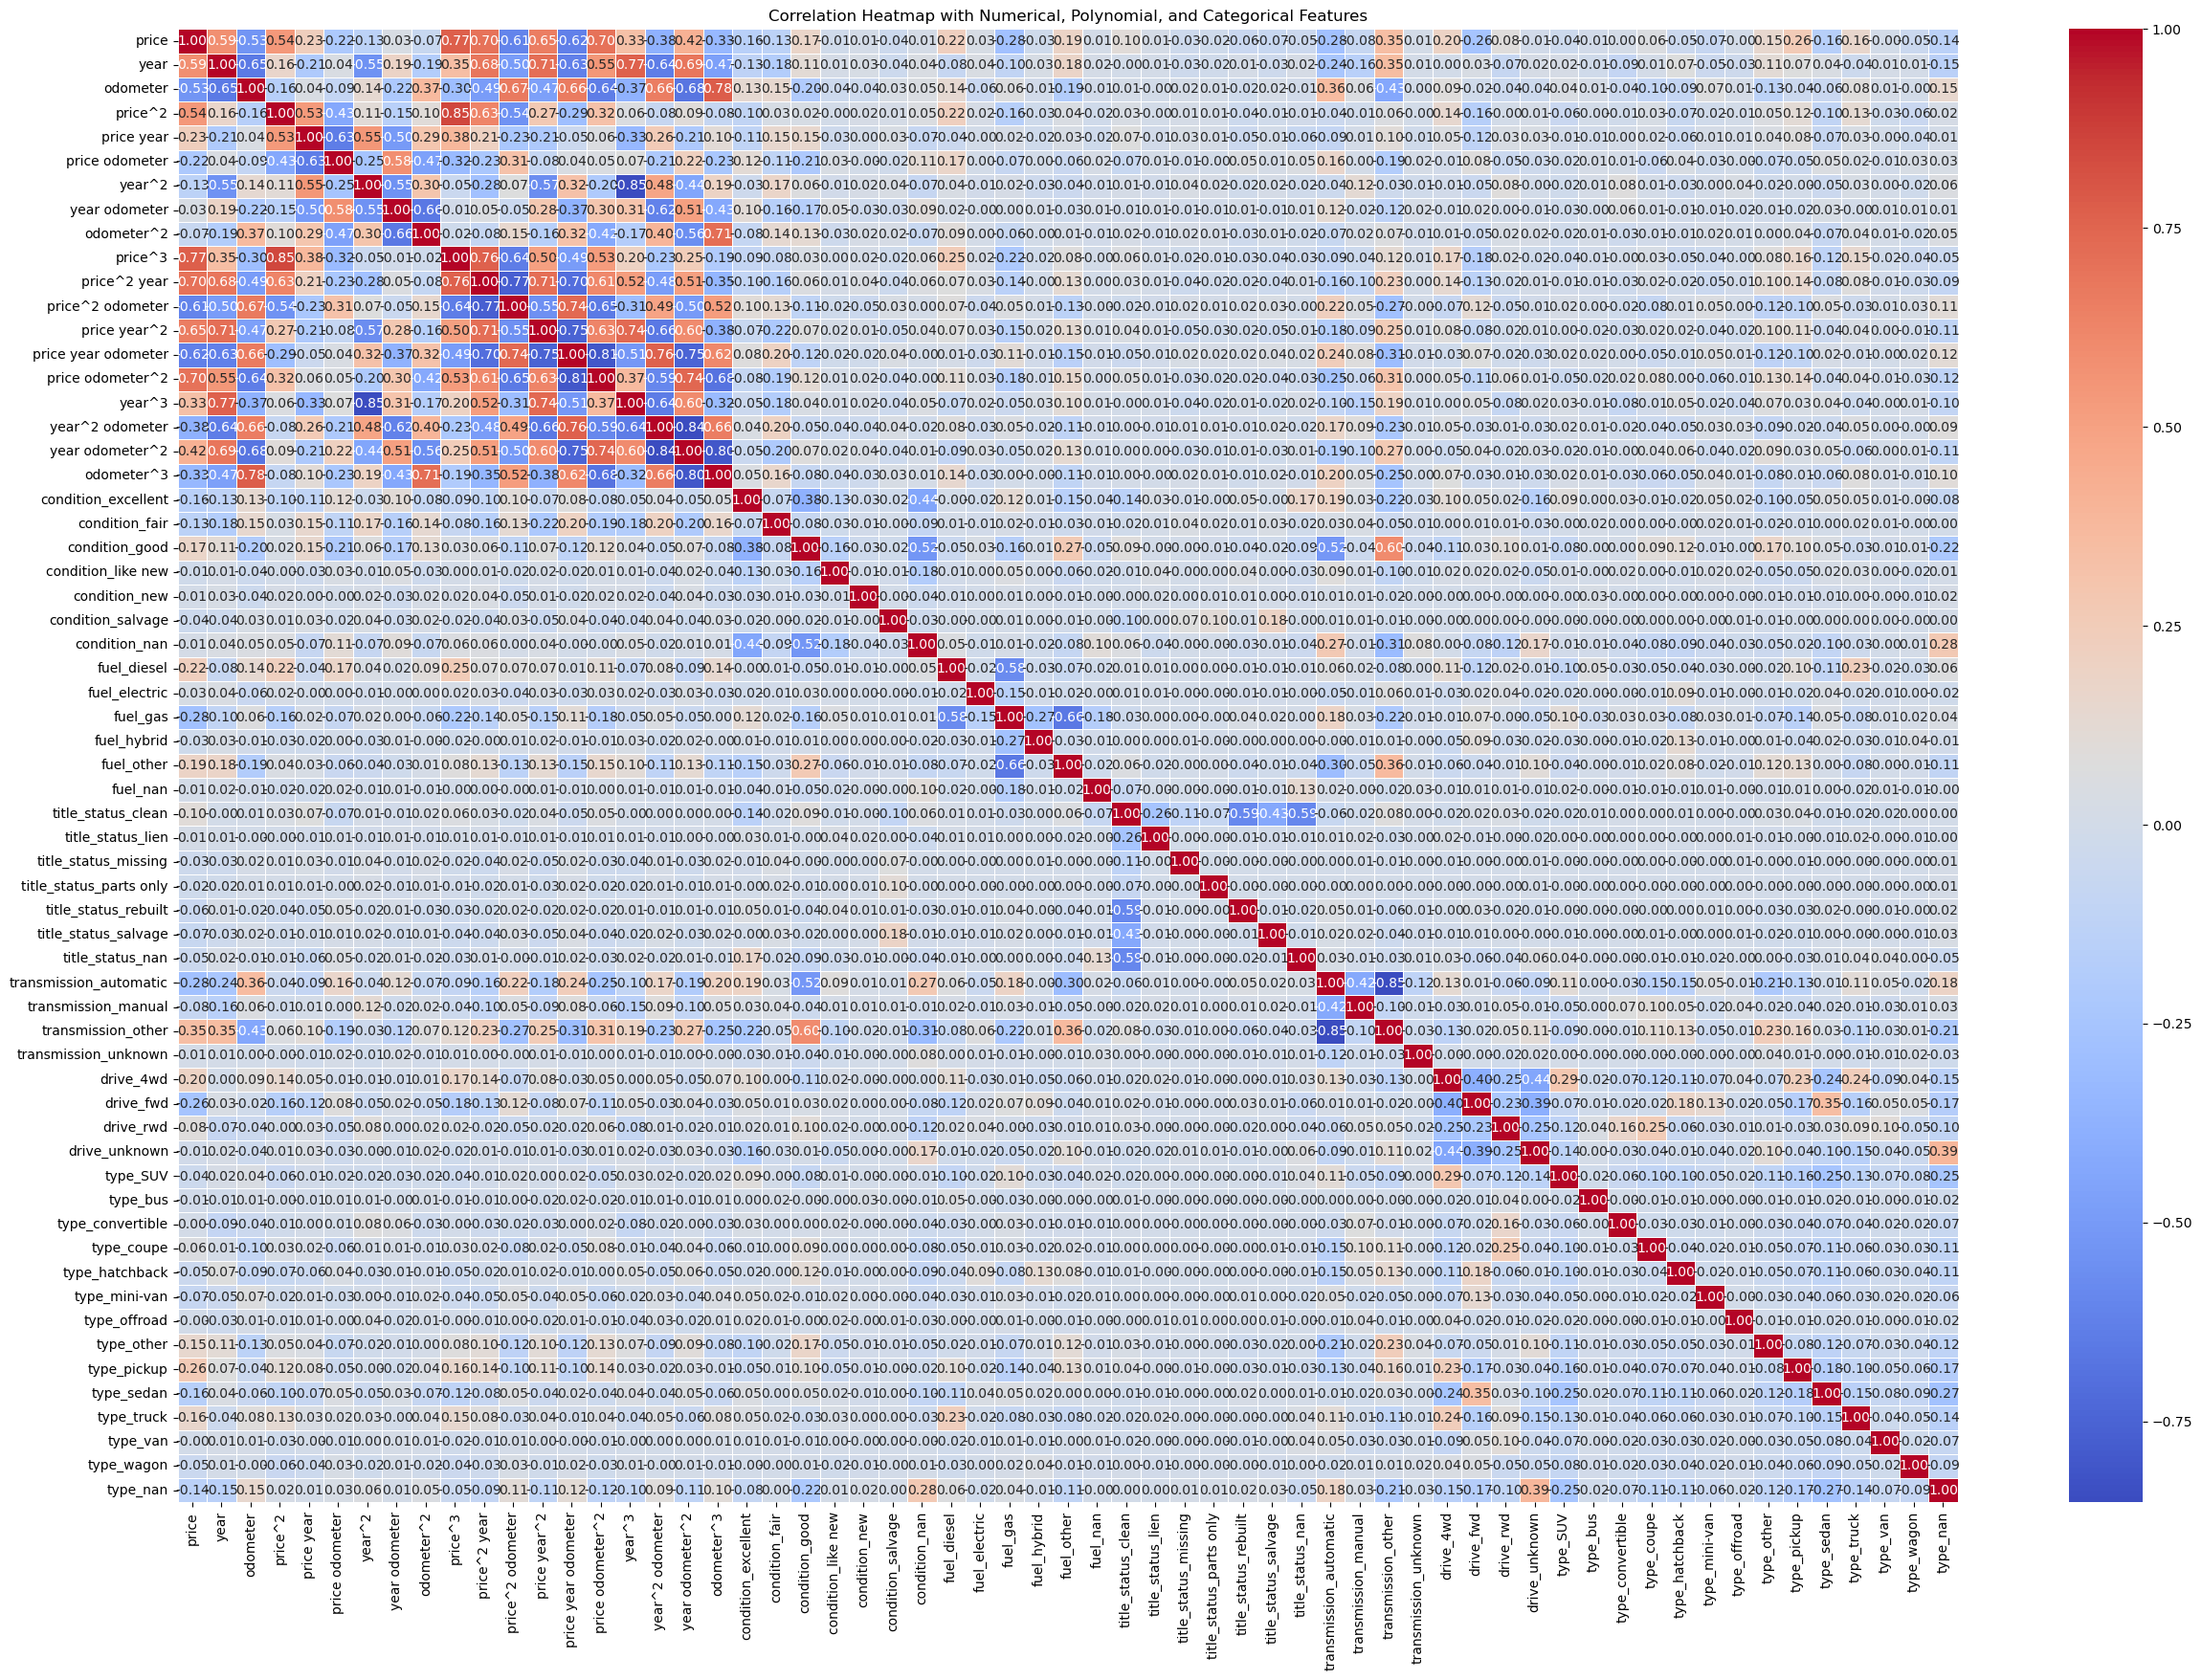

In [137]:
# Define categorical and numerical columns
categorical_cols = ['condition', 'fuel', 'title_status', 'transmission', 'drive', 'type']
numeric_cols = ['price', 'year', 'odometer']

# Apply Polynomial Features to numerical columns
poly = PolynomialFeatures(degree=3, include_bias=False)  # Create polynomial features (degree=2 for simplicity)

# Generate polynomial features for numeric columns
polynomial_features = poly.fit_transform(df_clean[numeric_cols])

# Convert the polynomial features into a DataFrame
polynomial_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(numeric_cols))

# One-Hot Encoding for categorical features (default is sparse=True)
encoder = OneHotEncoder(handle_unknown='ignore')

# Apply OneHotEncoder to the categorical columns
df_encoded = encoder.fit_transform(df_clean[categorical_cols])

# Convert the encoded values to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the numerical features, polynomial features, and encoded categorical features
df_combined = pd.concat([polynomial_df, encoded_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Numerical, Polynomial, and Categorical Features')
plt.show()

#### Create model

In [138]:
# Generate train/test data
X = df_clean.drop(['price'], axis = 1)
y = df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [139]:
# Categorical features and numeric features
categorical_cols = ['condition', 'fuel', 'title_status', 'transmission', 'drive', 'type']
numeric_cols = ['year', 'odometer']

# ColumnTransformer: Apply polynomial features & one-hot encoding separately
preprocessor = ColumnTransformer([
    ('poly', PolynomialFeatures(degree=3, include_bias=False), numeric_cols),  # Polynomial expansion for numeric
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHot encode categorical features
])


In [149]:
# Check basic linear regression model
pipe = Pipeline([('preprocessor', preprocessor), 
                  ('linreg', LinearRegression())])
pipe.fit(X_train[['year', 'odometer', 'condition', 'drive', 'transmission', 'type', 'fuel', 'title_status']], y_train)
pred_train = pipe.predict(X_train[['year', 'odometer', 'condition', 'drive', 'transmission', 'type', 'fuel', 'title_status']])
pred_test = pipe.predict(X_test[['year', 'odometer', 'condition', 'drive', 'transmission', 'type', 'fuel', 'title_status']])
pipe_train_mse = mean_squared_error(y_train, pred_train)
pipe_test_mse = mean_squared_error(y_test, pred_test)

print(pipe.named_steps)
print(f'Train MSE: {pipe_train_mse: .2f}')
print(f'Test MSE: {pipe_test_mse: .2f}')

{'preprocessor': ColumnTransformer(transformers=[('poly',
                                 PolynomialFeatures(degree=3,
                                                    include_bias=False),
                                 ['year', 'odometer']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['condition', 'fuel', 'title_status',
                                  'transmission', 'drive', 'type'])]), 'linreg': LinearRegression()}
Train MSE:  0.38
Test MSE:  0.38


In [150]:
# Check that the transformer provides correct output
auto_pipe = Pipeline([('preprocessor', preprocessor),
                      ('lasso', Lasso(random_state = 42))])
auto_pipe.fit(X_train, y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_

print(type(lasso_coefs))
print(list(lasso_coefs))
auto_pipe

<class 'numpy.ndarray'>
[0.0, -0.0, -0.0, 0.0, -0.0, 0.019793677797396488, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['year', 'odometer']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type'])])),
                ('lasso', Lasso(random_state=42))])

In [142]:
feature_names = auto_pipe.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['poly__year', 'poly__odometer', 'poly__year^2',
       'poly__year odometer', 'poly__odometer^2', 'poly__year^3',
       'poly__year^2 odometer', 'poly__year odometer^2',
       'poly__odometer^3', 'onehot__condition_excellent',
       'onehot__condition_fair', 'onehot__condition_good',
       'onehot__condition_like new', 'onehot__condition_new',
       'onehot__condition_salvage', 'onehot__condition_nan',
       'onehot__fuel_diesel', 'onehot__fuel_electric', 'onehot__fuel_gas',
       'onehot__fuel_hybrid', 'onehot__fuel_other', 'onehot__fuel_nan',
       'onehot__title_status_clean', 'onehot__title_status_lien',
       'onehot__title_status_missing', 'onehot__title_status_parts only',
       'onehot__title_status_rebuilt', 'onehot__title_status_salvage',
       'onehot__title_status_nan', 'onehot__transmission_automatic',
       'onehot__transmission_manual', 'onehot__transmission_other',
       'onehot__transmission_unknown', 'onehot__drive_4wd',
       'onehot__drive_fwd',

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Define simple lasso pipeline
auto_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('lasso', Lasso(random_state=42))  # Lasso regression
])

auto_pipe.fit(X_train, y_train)
y_pred = auto_pipe.predict(X_test)
train_preds = auto_pipe.predict(X_train)
test_preds = auto_pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Lasso Train MSE: {train_mse}')
print(f'Lasso Test MSE: {test_mse}')

Lasso Train MSE: 0.9546813517174919
Lasso Test MSE: 0.9538781642703004


In [ ]:
# Use lasso as selector
model_selector_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('selector', SelectFromModel(Lasso())),
    ('linreg', LinearRegression())
])

model_selector_pipe.fit(X_train, y_train)
y_pred = model_selector_pipe.predict(X_test)
train_preds = model_selector_pipe.predict(X_train)
test_preds = model_selector_pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Lasso select Train MSE: {train_mse}')
print(f'Lasso select Test MSE: {test_mse}')

Lasso select Train MSE: 0.888930571410111
Lasso select Test MSE: 0.8895854121922981


In [145]:

for nfeatures in range(1, 10):
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=nfeatures)),
        ('linreg', LinearRegression())
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    print(f'{nfeatures} Train MSE: {train_mse}')
    print(f'{nfeatures} Test MSE: {test_mse}')

1 Train MSE: 0.6568974102604702
1 Test MSE: 0.6589537475011291
2 Train MSE: 0.5801239038256536
2 Test MSE: 0.5818091965885716
3 Train MSE: 0.5253573236636341
3 Test MSE: 0.5239226041192334
4 Train MSE: 0.47662417430009535
4 Test MSE: 0.47273750044578156
5 Train MSE: 0.4543157036862768
5 Test MSE: 0.4512775918671671
6 Train MSE: 0.4348734402134398
6 Test MSE: 0.4319568988744053
7 Train MSE: 0.4203332866776372
7 Test MSE: 0.41750363457813794
8 Train MSE: 0.41122725084379114
8 Test MSE: 0.4085706168183375
9 Train MSE: 0.40373024348717296
9 Test MSE: 0.400632879061604


In [147]:
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=9)),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Access the fitted selector from the pipeline
sfs = pipe.named_steps['selector']  # Adjust 'selector' based on your step name

# Get selected feature mask (True for selected features)
selected_mask = sfs.get_support()

# Extract feature names
selected_features = feature_names[selected_mask]

# Access the trained Linear Regression model
linreg_model = pipe.named_steps['linreg']

# Get coefficients
coefficients = linreg_model.coef_

# Map selected features to their coefficients
selected_feature_coeffs = dict(zip(selected_features, coefficients))

# Print results
print("Selected Features and their Coefficients:")
for feature, coef in selected_feature_coeffs.items():
    print(f"{feature}: {coef}")

Selected Features and their Coefficients:
poly__year: 0.5438840881552738
poly__odometer: -0.23798122850287712
poly__year^2: 0.12031843845833819
onehot__fuel_diesel: 0.9445073624958884
onehot__title_status_clean: 0.42046838680085397
onehot__drive_fwd: -0.5558688702991175
onehot__drive_unknown: -0.21347225179514445
onehot__type_pickup: 0.48245460853951877
onehot__type_truck: 0.40331412369098446


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**A high-quality model should**:

- Capture key relationships between features and price.
- Generalize well to new data (avoiding overfitting or underfitting).
- Provide interpretable results that align with real-world intuition.
- This model selected six features, including both numerical (polynomial-transformed) and categorical (one-hot encoded) variables, to predict used car prices. By analyzing the feature coefficients, we can gauge their relative impact on pricing.

**Key Positive Influences on Price**

poly__year (0.55) & poly__year^2 (0.13):<br>
Newer vehicles tend to be priced higher, and the squared term suggests a non-linear effect, meaning price increases as a car is newer but at a diminishing rate.

onehot__fuel_diesel (1.06):<br>
Diesel vehicles tend to be priced higher, likely due to their better fuel economy and durability, which may be valued in the used car market.

onehot__type_pickup (0.48) & onehot__type_truck (0.40):<br>
Pickup trucks generally command a higher resale value, possibly due to their utility and demand in certain markets.

onehot__title_status_clean (0.42):<br>
Vehicles with a clean title (no major accidents, theft, or salvage history) sell at higher prices. This supports the notion that vehicle history significantly impacts pricing.

**Key Negative Influences on Price**

poly__odometer (-0.22):<br>
Higher mileage is associated with a lower price, which aligns with expectations, as greater wear and tear reduces vehicle value.

onehot__drive_fwd (-0.49):<br>
Front-wheel drive vehicles may be priced lower than all-wheel or rear-wheel drive models, possibly due to less performance appeal or lower perceived durability in certain segments.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Notes**:<br>
We have completed our initial analysis to identify key factors influencing used car prices. Our findings confirm that vehicle age and mileage are the strongest predictors, with newer cars commanding higher prices and higher mileage leading to lower resale values. Interestingly, our model also found a non-linear depreciation trend, where price drops at a slower rate as cars age.

Beyond these factors, vehicle characteristics also impact pricing. Diesel vehicles tend to be priced higher, likely due to their fuel efficiency and durability. Pickup trucks retain value better than other body types, while front-wheel drive vehicles are priced lower, possibly due to consumer preferences for other drivetrains.

Our model successfully captures major pricing trends, but there is room for further refinement. Including factors like brand reputation, regional demand, and vehicle condition could enhance accuracy. Additionally, testing alternative models could provide deeper insights into pricing patterns.